In [1]:
import matplotlib.pyplot as plt
import yaml

colors = [
'#c19277', #mpeg
'#62959c', #ours
'#9dad7f', #dds
'#d9dab0', #eaar
'#a98b98', #cloudseg
'#c1c0b9' # reducto
]
# set default parameters
plt.style.use('default')
plt.rcParams['font.size']=30
plt.rc('font', family='sans-serif')
plt.rcParams["font.weight"] = "medium"
plt.rcParams['pdf.fonttype'] = 42


import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Ellipse

def filter(keywords):
    assert isinstance(keywords, list)
    temp = [i for i in data_full if all(keyword in i['video_name'] for keyword in keywords)]

    if len(temp) == 0:
        print(keywords)
    return temp[-1]

def filters(keywords):
    assert isinstance(keywords, list)
    temp = [i for i in data_full if all(keyword in i['video_name'] for keyword in keywords)]

    if len(temp) == 0:
        print(keywords)
    return temp

def transform(data_list):
    return [i['bw'] / i['gt_bw'] for i in data_list], [i['f1'] for i in data_list]

def savefig(filename, fig):
    import time
    timestr = time.strftime("%Y%m%d-%H%M%S")
    filename = f'{filename}_time_{timestr}.pdf'
    fig.savefig(filename, bbox_inches='tight')

def add_data(ax, data, color):

    # print(data[1])
    cov = np.cov(data[0], data[1])
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_) / math.sqrt(len(data[0]))
    
    print(np.mean(data[0]), np.mean(data[1]))

    ell = Ellipse(xy=(np.mean(data[0]), np.mean(data[1])),
            width=lambda_[0]*2,
            height=lambda_[1]*2,
            angle=np.rad2deg(np.arccos(v[0,0])),
            alpha=0.9)
    ell.set_edgecolor(color)
    ell.set_facecolor(color)
    ax.add_artist(ell)
    #plt.scatter(data[0], data[1], c = color)
    ax.scatter([np.mean(data[0])], [np.mean(data[1])], marker = 'o', color = 'black', s=10,zorder=3)
    return np.mean(data[0]).item(), np.mean(data[1]).item()




## Plot efficientdet result based on drone videos derived by FPN compressor

In [2]:

# plot drone for FPN


with open(f'stats_FPN', 'r') as f:
    data_full = yaml.load(f.read())
# add ground truth bandwidth for normalization purpose
for data in data_full:
    data['gt_bw'] = filter([data['ground_truth_name']])['bw']

# fmt = 'visdrone/videos/vis_%d'
# ids = range(169, 174)
fmt = 'dashcam/dashcam_%d_'
ids = [2]

# accs = [filter([fmt % i, 'blackgen_','bound_0.5', 'conv_9']) for i in ids]
accs = [filter([fmt % i, 'SSD']) for i in ids]
# ddss = [filter([fmt % i, 'dds']) for i in ids]
# eaars = [filter([fmt % i, 'eaar']) for i in ids]
# cloudsegs = [filter([fmt % i, 'cloudseg', '40']) for i in ids]
# reductos = [filter([fmt % i, 'reducto', '28']) for i in ids]


mpegs = []
for i, acc in zip(ids, accs):
    batch = filters([(fmt % i) + 'qp_'])
    # print(len(batch))
    # print(acc)
    if (i == 1):
        print([i['f1'] for i in batch])

    print(acc['f1'])

    batch = [b for b in batch if b['f1'] < acc['f1']]
    batch = sorted(batch, key=lambda x: -x['bw'])

    mpegs.append(batch[0])
# mpegs = [filter([fmt%i + '_' + 'qp_40']) for i in ids]

accs = transform(accs)
mpegs = transform(mpegs)
# ddss = transform(ddss)
# eaars = transform(eaars)
# cloudsegs = transform(cloudsegs)
# reductos = transform(reductos)



fig, ax = plt.subplots(figsize=(7, 5))
ax.grid()

x, y = add_data(ax, mpegs, colors[0])
ax.text(x + 0.05, y - 0.0, 'AWStream')
x, y = add_data(ax, accs, colors[1])
ax.text(x - 0.2, y +0.12, 'AccMPEG')
# x, y = add_data(ax, ddss, colors[2])
# ax.text(x - 0.1, y +0.02, 'DDS')
# x, y = add_data(ax, eaars, colors[3])
# ax.text(x - 0.15, y - 0.07, 'EAAR')
# x, y = add_data(ax, cloudsegs, colors[4])
# ax.text(x + 0.01, y - 0.02, 'CloudSeg')
# x, y = add_data(ax, reductos, colors[5])
# ax.text(x + 0.01, y - 0.06, 'Reducto')

l, r = 0, 1.19
b, u = 0.3, 0.95

ax.set_xlim(l,r)
ax.set_ylim(b,u)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xlabel('Normalized file size')
ax.set_ylabel('Accuracy')

bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
t = ax.text(r,b, "Better", ha="right", va="bottom", rotation=-45,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("larrow", pad=0.05)

# savefig('figs/detection_drone_FPN', fig)



/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


0.6066715717315674


IndexError: list index out of range

/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


[0.9886589050292969, 0.9903518557548523, 0.9886524677276611, 0.9880850911140442, 0.9880918860435486, 0.9824512004852295, 0.9813401103019714, 0.9771121740341187, 0.9717658162117004, 0.9886589050292969, 0.9903518557548523, 0.9886524677276611, 0.9880850911140442, 0.9880918860435486, 0.9824512004852295, 0.9813401103019714, 0.9771121740341187, 0.9717658162117004, 0.9886589050292969, 0.9903518557548523, 0.9886524677276611, 0.9880850911140442, 0.9880918860435486, 0.9824512004852295, 0.9813401103019714, 0.9771121740341187, 0.9717658162117004]
0.9877875447273254
0.9180659651756287
0.8866892457008362
0.7142476439476013
0.9505732655525208
0.9270747900009155
0.7934238910675049
0.8927246332168579
0.766421914100647
0.907313883304596
0.553262926226369 0.8645373821258545
0.5327116137394999 0.8744322776794433


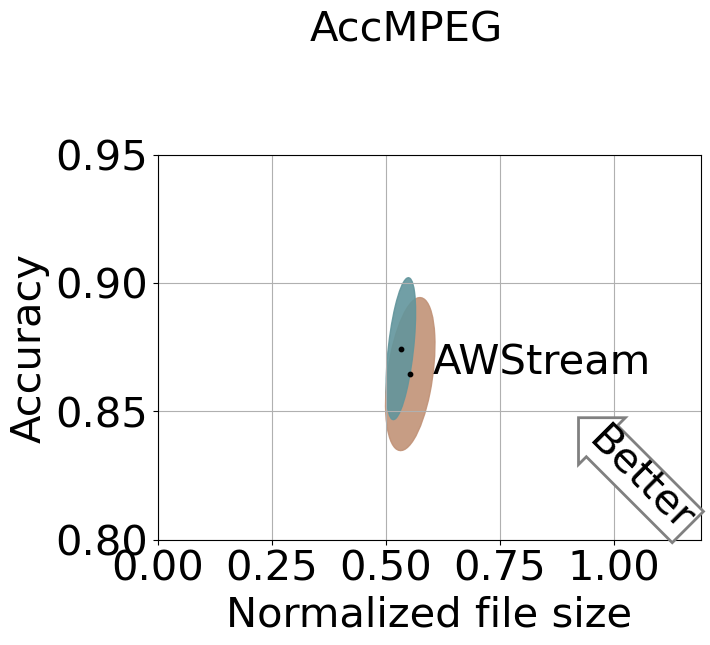

In [5]:

# plot drone for FPN


with open(f'stats_FPN_QP20_thresh75_dashcamcropped', 'r') as f:
    data_full = yaml.load(f.read())
# add ground truth bandwidth for normalization purpose
for data in data_full:
    data['gt_bw'] = filter([data['ground_truth_name']])['bw']

# fmt = 'visdrone/videos/vis_%d'
# ids = range(169, 174)
fmt = 'dashcam/dashcamcropped_%d_'
ids = range(1, 11)

# accs = [filter([fmt % i, 'blackgen_','bound_0.5', 'conv_9']) for i in ids]
accs = [filter([fmt % i, 'lq_40']) for i in ids]
# ddss = [filter([fmt % i, 'dds']) for i in ids]
# eaars = [filter([fmt % i, 'eaar']) for i in ids]
# cloudsegs = [filter([fmt % i, 'cloudseg', '40']) for i in ids]
# reductos = [filter([fmt % i, 'reducto', '28']) for i in ids]


mpegs = []
for i, acc in zip(ids, accs):
    batch = filters([(fmt % i) + 'qp_'])
    # print(len(batch))
    # print(acc)
    if (i == 1):
        print([i['f1'] for i in batch])

    print(acc['f1'])

    batch = [b for b in batch if b['f1'] < acc['f1']]
    batch = sorted(batch, key=lambda x: -x['bw'])

    mpegs.append(batch[0])
# mpegs = [filter([fmt%i + '_' + 'qp_40']) for i in ids]

accs = transform(accs)
mpegs = transform(mpegs)
# ddss = transform(ddss)
# eaars = transform(eaars)
# cloudsegs = transform(cloudsegs)
# reductos = transform(reductos)



fig, ax = plt.subplots(figsize=(7, 5))
ax.grid()

x, y = add_data(ax, mpegs, colors[0])
ax.text(x + 0.05, y - 0.0, 'AWStream')
x, y = add_data(ax, accs, colors[1])
ax.text(x - 0.2, y +0.12, 'AccMPEG')
# x, y = add_data(ax, ddss, colors[2])
# ax.text(x - 0.1, y +0.02, 'DDS')
# x, y = add_data(ax, eaars, colors[3])
# ax.text(x - 0.15, y - 0.07, 'EAAR')
# x, y = add_data(ax, cloudsegs, colors[4])
# ax.text(x + 0.01, y - 0.02, 'CloudSeg')
# x, y = add_data(ax, reductos, colors[5])
# ax.text(x + 0.01, y - 0.06, 'Reducto')

l, r = 0, 1.19
b, u = 0.8, 0.95

ax.set_xlim(l,r)
ax.set_ylim(b,u)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xlabel('Normalized file size')
ax.set_ylabel('Accuracy')

bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
t = ax.text(r,b, "Better", ha="right", va="bottom", rotation=-45,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("larrow", pad=0.05)

# savefig('figs/detection_drone_FPN', fig)



## Plot the learning curve on model of different compute complexity

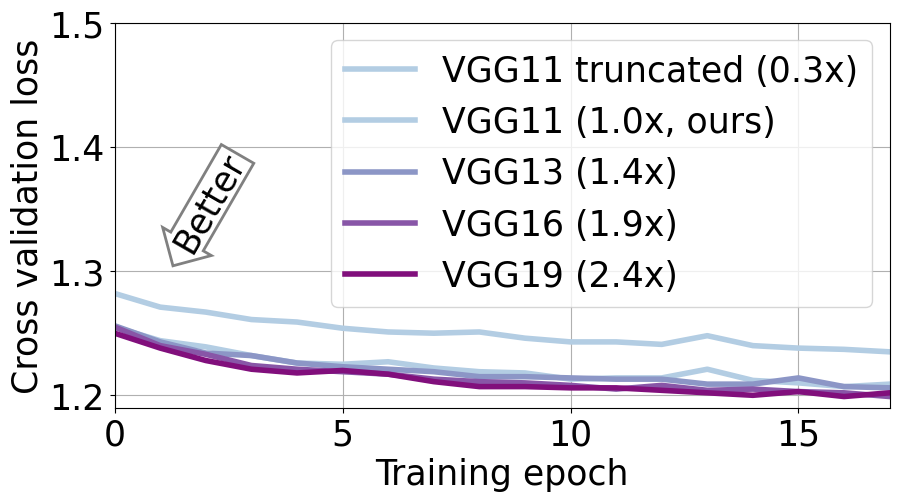

In [46]:
_ = ["#edf8fb",
"#b3cde3",
"#8c96c6",
"#8856a7",
"#810f7c"]
line_colors = _

import re
exp = 'cross validation loss: ([0-9\.]*)'
exp = re.compile(exp)

plt.rcParams['font.size']=25


def plot_curve(ax, name, l, c):

    data = []

    with open('train_COCO_Detection_FPN_%s.log' % name) as f:
        for idx, i in enumerate(re.findall(exp, f.read())):
            if idx == 21:
                break
            data.append(float(i))

    plt.plot(data, label=l, c=c, linewidth=4)


fig, ax = plt.subplots(figsize=(10, 5))
ax.grid()

plot_curve(ax, 'vgg11_small_small','VGG11 truncated (0.3x)', _[1])
plot_curve(ax, 'vgg11','VGG11 (1.0x, ours)', _[1])
plot_curve(ax, 'vgg13','VGG13 (1.4x)', _[2])
plot_curve(ax, 'vgg16','VGG16 (1.9x)', _[3])
plot_curve(ax, 'vgg19','VGG19 (2.4x)', _[4])


l, r = 0, 17
b, u = 1.19, 1.5

ax.set_xlim(l,r)
ax.set_ylim(b,u)

bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
t = ax.text(3,1.4, "Better", ha="right", va="top", rotation=60,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("larrow", pad=0.05)

ax.legend()
ax.set_ylabel('Cross validation loss')
ax.set_xlabel('Training epoch')
ax.set_xticks([0, 5, 10, 15])



savefig('figs/training-curve-vs-arch', fig)



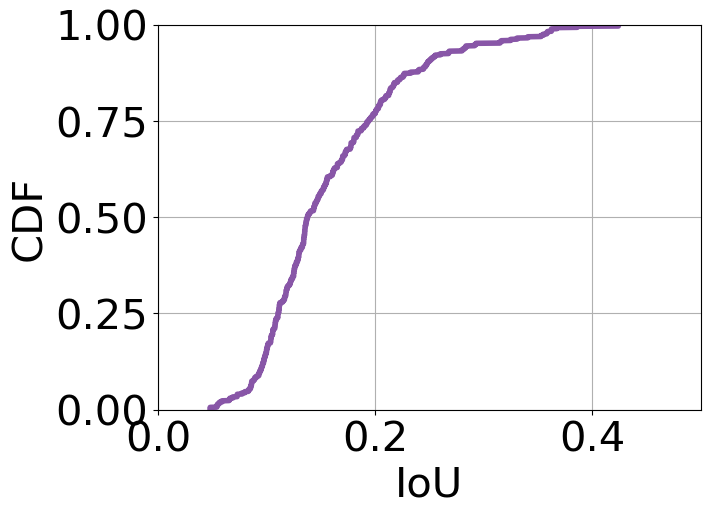

In [33]:


import yaml

attr = "DC5"

plt.rcParams['font.size']=30

with open(f"IoU_{attr}.txt", "r") as f:
    data = yaml.safe_load(f.read())


data.sort()

fig, ax = plt.subplots(figsize=(7, 5))
ax.grid()

ax.plot(data, [i / len(data) for i in range(len(data))], c=line_colors[3], linewidth=4)
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('IoU')
ax.set_ylabel('CDF')

savefig(f'figs/IoU_{attr}', fig)